### Exploratory Data Analysis

<b> Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<b>Random seed set

In [2]:
np.random.seed(33)

<b> Dataset loading

In [3]:
df = pd.read_csv("abcnews-date-text.csv")

In [4]:
print("Shape:",df.shape, end="\n\n")
print("Head:\n", df.head())
print(f"\nNull Values:\n{df.isnull().sum()}", end="\n\n")
print(df.info(), end="\n\n")
print(f"Unique Values:\n{df.nunique()}", end="\n\n")
print(f"Describe():\n{df.describe()}")

Shape: (1244184, 2)

Head:
    publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers

Null Values:
publish_date     0
headline_text    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244184 non-null  int64 
 1   headline_text  1244184 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB
None

Unique Values:
publish_date        6882
headline_text    1213004
dtype: int64

Describe():
       publish_date
count  1.244184e+06
mean   2.011021e+07
std 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244184 non-null  int64 
 1   headline_text  1244184 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


<b> How many features contain numbers

In [6]:
len(df["headline_text"])

1244184

In [7]:
df['has_numbers'] = df['headline_text'].str.contains(r'\d', na=False).astype(int)

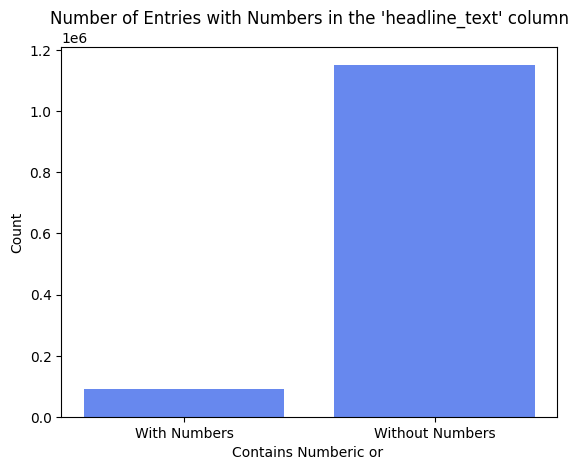

In [8]:
df['has_numbers'] = df['headline_text'].str.contains(r'\d', na=False).astype(int)


num_entries_with_numbers = df['has_numbers'].sum()
sns.set_palette("coolwarm")

plt.bar(["With Numbers", "Without Numbers"], [num_entries_with_numbers, len(df) - num_entries_with_numbers])
plt.xlabel("Contains Numberic or ")
plt.ylabel("Count")
plt.title("Number of Entries with Numbers in the 'headline_text' column")
plt.show()

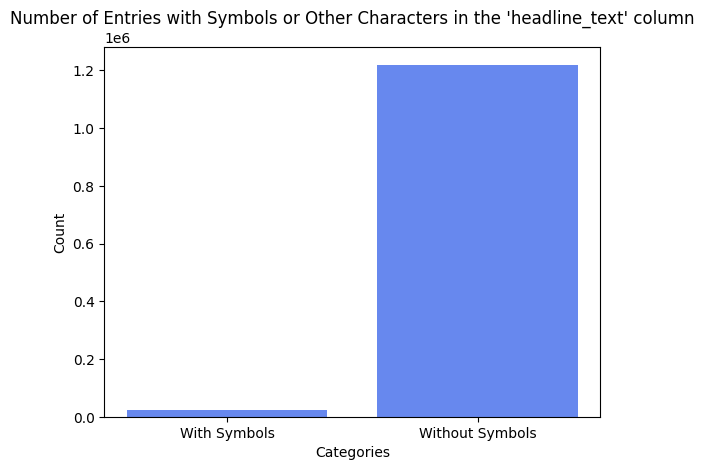

In [9]:
df['has_symbols'] = df['headline_text'].str.contains(r'[^\w\s]', na=False).astype(int)
num_entries_with_symbols = df['has_symbols'].sum()

# Plot the count
plt.bar(["With Symbols", "Without Symbols"], [num_entries_with_symbols, len(df) - num_entries_with_symbols])
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Number of Entries with Symbols or Other Characters in the 'headline_text' column")
plt.show()

<b> Converting Date to datetime

In [10]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df['year'] = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month

<b> Plot Date

In [11]:
df

,publish_date,headline_text,has_numbers,has_symbols,year,month
0,2003-02-19,aba decides against community broadcasting lic...,0,0,2003,2
1,2003-02-19,act fire witnesses must be aware of defamation,0,0,2003,2
2,2003-02-19,a g calls for infrastructure protection summit,0,0,2003,2
3,2003-02-19,air nz staff in aust strike for pay rise,0,0,2003,2
4,2003-02-19,air nz strike to affect australian travellers,0,0,2003,2
...,...,...,...,...,...,...
1244179,2021-12-31,two aged care residents die as state records 2...,1,1,2021,12
1244180,2021-12-31,victoria records 5;919 new cases and seven deaths,1,1,2021,12
1244181,2021-12-31,wa delays adopting new close contact definition,0,0,2021,12
1244182,2021-12-31,western ringtail possums found badly dehydrate...,0,0,2021,12


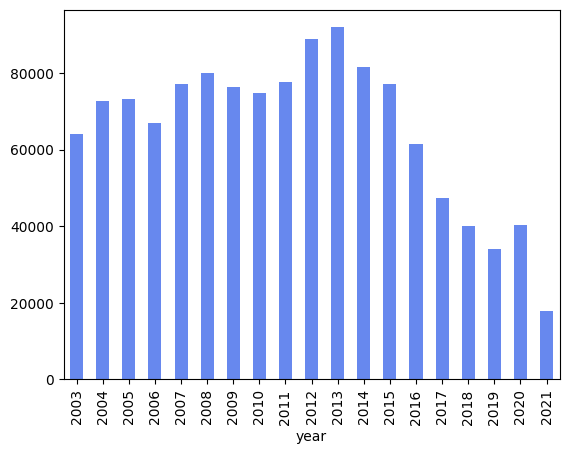

In [12]:
entry_counts = df.groupby('year').size()
entry_counts.plot(kind='bar')

plt.show()

<b> Explore case of text

In [13]:
def categorize_text(headline):
    if any(char.isupper() for char in headline):
        return 1  # Text has at least one capital letter
    else:
        return 0  # Text has no capital letters

df['contains_upper'] = df['headline_text'].apply(categorize_text)

In [14]:
df['contains_upper'].value_counts()

contains_upper
0    1244184
Name: count, dtype: int64

### Data Wrangling

<b> Dropping date

In [17]:
#df = df.drop("publish_date", axis=1)

<b> Removing numeric and special characters

In [16]:
# can also be dropped from the dataset
df1 = df[df["has_symbols"] == 0]
df1 = df1[df1["has_numbers"] == 0]
print(f"Shape of dataset when removing entries: {df1.shape}")
df1 = None

Shape of dataset when removing entries: (1132423, 7)


In [18]:
def remove_numeric(headline):
    return re.sub(r'\d', '', headline)

# Apply the function to the 'text' column
df['headline_text'] = df['headline_text'].apply(remove_numeric)
print(f"Shape of dataset when removing keeping entries: {df.shape}")

Shape of dataset when removing keeping entries: (1244184, 7)


<b> Ensure lower case

In [19]:
df["headline_text"] = df["headline_text"].str.lower()

<b> Remove columns

In [20]:
columns = ["has_numbers", "has_symbols", "contains_upper"]
df = df.drop(columns, axis=1)

### Preprocessing

<b>Imports

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk import ngrams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

<b> Tokenisation

In [22]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

df['tokens'] = df['headline_text'].apply(tokenize_text)

<b> Remove Stop Words

In [23]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

df['filtered_tokens'] = df['tokens'].apply(remove_stopwords)

<b>Removing initials and other one letter words

In [24]:
def analyse_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

In [25]:
text = "air nz strike affect Australian travellers"

sent = analyse_sentiment(text)
print(f"Sentiment Analysis of verse :\n\n'{text}'\n\nSentiment: {sent}")

Sentiment Analysis of verse :

'air nz strike affect Australian travellers'

Sentiment: 0.0


In [26]:
text = "air strike affect Australian travellers"
sent = analyse_sentiment(text)
print(f"Sentiment Analysis of verse :\n\n'{text}'\n\nSentiment: {sent}")

Sentiment Analysis of verse :

'air strike affect Australian travellers'

Sentiment: 0.0


In [27]:
def filter_words(words):
    return list(filter(lambda x: len(x) <= 1, words))

df['test'] = df['filtered_tokens'].apply(filter_words)
df['test'].value_counts()

test
[]              1214549
[:]                6509
[;]                5287
[']                3356
[b]                1456
                 ...   
[b, n]                1
[', x, :]             1
[;, :, ;, n]          1
[u, n]                1
[j, b]                1
Name: count, Length: 238, dtype: int64

In [28]:
def filter_words(words):
    return list(filter(lambda x: len(x) <= 2, words))

df['test'] = df['filtered_tokens'].apply(filter_words)
df['test'].value_counts()

test
[]               1091362
[us]               18529
[wa]               12564
[sa]                9643
[nt]                7542
                  ...   
[v, gc]                1
['s, $, k, ;]          1
[en, mh]               1
[dy]                   1
[:, nt, wa]            1
Name: count, Length: 3468, dtype: int64

In [29]:
def filter_words(words):
    return list(filter(lambda x: len(x) > 2, words))
df['filtered_tokens'] = df['filtered_tokens'].apply(filter_words)
df = df.drop(["test"],axis=1)
df.head()

,publish_date,headline_text,year,month,tokens,filtered_tokens
0,2003-02-19,aba decides against community broadcasting lic...,2003,2,"[aba, decides, against, community, broadcastin...","[aba, decides, community, broadcasting, licence]"
1,2003-02-19,act fire witnesses must be aware of defamation,2003,2,"[act, fire, witnesses, must, be, aware, of, de...","[act, fire, witnesses, must, aware, defamation]"
2,2003-02-19,a g calls for infrastructure protection summit,2003,2,"[a, g, calls, for, infrastructure, protection,...","[calls, infrastructure, protection, summit]"
3,2003-02-19,air nz staff in aust strike for pay rise,2003,2,"[air, nz, staff, in, aust, strike, for, pay, r...","[air, staff, aust, strike, pay, rise]"
4,2003-02-19,air nz strike to affect australian travellers,2003,2,"[air, nz, strike, to, affect, australian, trav...","[air, strike, affect, australian, travellers]"


<b> Number of Words

In [30]:
df["number_of_words"] = df["tokens"].apply(len)

In [31]:
df['fd'] = df['filtered_tokens'].apply(FreqDist)

<b> Unique Words

In [32]:
df["unique_words"] = df['fd'].apply(lambda x: len(x))

<b> ngrams (Bigrams)

In [33]:
n=2
df['ngrams'] = df['filtered_tokens'].apply(lambda x: list(ngrams(x, n)))

In [34]:
ngrams_row = df['ngrams'][0] 
ngrams_row

[('aba', 'decides'),
 ('decides', 'community'),
 ('community', 'broadcasting'),
 ('broadcasting', 'licence')]

<b> Frequency of Bigrams

In [35]:
all_bigrams = [bigram for sublist in df['ngrams'] for bigram in sublist]

# Calculate the frequency distribution of bigrams
freq_dist = FreqDist(all_bigrams)

# Retrieve the most common bigrams
most_common_bigrams = freq_dist.most_common(10)

In [36]:
most_common_bigrams

[(('man', 'charged'), 3927),
 (('gold', 'coast'), 3643),
 (('world', 'cup'), 3399),
 (('country', 'hour'), 2973),
 (('donald', 'trump'), 2630),
 (('pleads', 'guilty'), 2355),
 (('mental', 'health'), 2302),
 (('climate', 'change'), 2197),
 (('police', 'investigate'), 1964),
 (('new', 'zealand'), 1714)]

In [37]:
type(most_common_bigrams)
len(freq_dist)

2522413

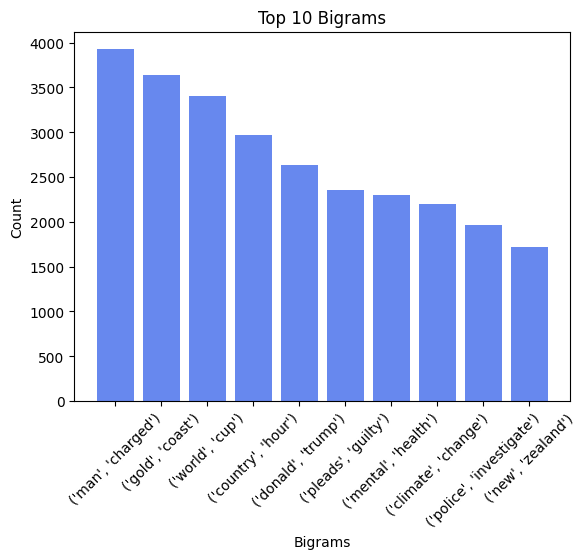

In [38]:
categories = [str(t[0]) for t in most_common_bigrams]
numbers = [t[1] for t in most_common_bigrams]

plt.bar(categories, numbers)
plt.xticks(rotation=45)
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.title('Top 10 Bigrams')
plt.show()

<b> Polarity

In [39]:
sentiment = SentimentIntensityAnalyzer()

In [40]:
df.head()

,publish_date,headline_text,year,month,tokens,filtered_tokens,number_of_words,fd,unique_words,ngrams
0,2003-02-19,aba decides against community broadcasting lic...,2003,2,"[aba, decides, against, community, broadcastin...","[aba, decides, community, broadcasting, licence]",6,"{'aba': 1, 'decides': 1, 'community': 1, 'broa...",5,"[(aba, decides), (decides, community), (commun..."
1,2003-02-19,act fire witnesses must be aware of defamation,2003,2,"[act, fire, witnesses, must, be, aware, of, de...","[act, fire, witnesses, must, aware, defamation]",8,"{'act': 1, 'fire': 1, 'witnesses': 1, 'must': ...",6,"[(act, fire), (fire, witnesses), (witnesses, m..."
2,2003-02-19,a g calls for infrastructure protection summit,2003,2,"[a, g, calls, for, infrastructure, protection,...","[calls, infrastructure, protection, summit]",7,"{'calls': 1, 'infrastructure': 1, 'protection'...",4,"[(calls, infrastructure), (infrastructure, pro..."
3,2003-02-19,air nz staff in aust strike for pay rise,2003,2,"[air, nz, staff, in, aust, strike, for, pay, r...","[air, staff, aust, strike, pay, rise]",9,"{'air': 1, 'staff': 1, 'aust': 1, 'strike': 1,...",6,"[(air, staff), (staff, aust), (aust, strike), ..."
4,2003-02-19,air nz strike to affect australian travellers,2003,2,"[air, nz, strike, to, affect, australian, trav...","[air, strike, affect, australian, travellers]",7,"{'air': 1, 'strike': 1, 'affect': 1, 'australi...",5,"[(air, strike), (strike, affect), (affect, aus..."


In [41]:
# Apply sentiment analysis to a column in the DataFrame
df['sentiment_score'] = df['headline_text'].apply(analyse_sentiment)
df.head()

,publish_date,headline_text,year,month,tokens,filtered_tokens,number_of_words,fd,unique_words,ngrams,sentiment_score
0,2003-02-19,aba decides against community broadcasting lic...,2003,2,"[aba, decides, against, community, broadcastin...","[aba, decides, community, broadcasting, licence]",6,"{'aba': 1, 'decides': 1, 'community': 1, 'broa...",5,"[(aba, decides), (decides, community), (commun...",0.00
1,2003-02-19,act fire witnesses must be aware of defamation,2003,2,"[act, fire, witnesses, must, be, aware, of, de...","[act, fire, witnesses, must, aware, defamation]",8,"{'act': 1, 'fire': 1, 'witnesses': 1, 'must': ...",6,"[(act, fire), (fire, witnesses), (witnesses, m...",0.25
2,2003-02-19,a g calls for infrastructure protection summit,2003,2,"[a, g, calls, for, infrastructure, protection,...","[calls, infrastructure, protection, summit]",7,"{'calls': 1, 'infrastructure': 1, 'protection'...",4,"[(calls, infrastructure), (infrastructure, pro...",0.00
3,2003-02-19,air nz staff in aust strike for pay rise,2003,2,"[air, nz, staff, in, aust, strike, for, pay, r...","[air, staff, aust, strike, pay, rise]",9,"{'air': 1, 'staff': 1, 'aust': 1, 'strike': 1,...",6,"[(air, staff), (staff, aust), (aust, strike), ...",0.00
4,2003-02-19,air nz strike to affect australian travellers,2003,2,"[air, nz, strike, to, affect, australian, trav...","[air, strike, affect, australian, travellers]",7,"{'air': 1, 'strike': 1, 'affect': 1, 'australi...",5,"[(air, strike), (strike, affect), (affect, aus...",0.00


In [42]:
df.describe()

,publish_date,year,month,number_of_words,unique_words,sentiment_score
count,1244184,1.244184e+06,1.244184e+06,1.244184e+06,1.244184e+06,1.244184e+06
mean,2011-06-15 09:12:08.458169600,2.010955e+03,6.511898e+00,6.519642e+00,5.247059e+00,1.726065e-02
min,2003-02-19 00:00:00,2.003000e+03,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2007-06-15 00:00:00,2.007000e+03,4.000000e+00,5.000000e+00,4.000000e+00,0.000000e+00
50%,2011-06-22 00:00:00,2.011000e+03,7.000000e+00,6.000000e+00,5.000000e+00,0.000000e+00
75%,2015-02-20 00:00:00,2.015000e+03,9.000000e+00,8.000000e+00,6.000000e+00,0.000000e+00
max,2021-12-31 00:00:00,2.021000e+03,1.200000e+01,1.600000e+01,1.200000e+01,1.000000e+00
std,NaN,4.841886e+00,3.389431e+00,1.882039e+00,1.436780e+00,1.884589e-01


In [43]:
filtered_df = df.loc[df["sentiment_score"] == -1]

In [44]:
filtered_df.head()

,publish_date,headline_text,year,month,tokens,filtered_tokens,number_of_words,fd,unique_words,ngrams,sentiment_score
1248,2003-02-25,cotton week to coincide with worst season,2003,2,"[cotton, week, to, coincide, with, worst, season]","[cotton, week, coincide, worst, season]",7,"{'cotton': 1, 'week': 1, 'coincide': 1, 'worst...",5,"[(cotton, week), (week, coincide), (coincide, ...",-1.0
2336,2003-03-01,tyson blasts pathetic don king,2003,3,"[tyson, blasts, pathetic, don, king]","[tyson, blasts, pathetic, king]",5,"{'tyson': 1, 'blasts': 1, 'pathetic': 1, 'king...",4,"[(tyson, blasts), (blasts, pathetic), (patheti...",-1.0
3815,2003-03-09,henry very doubtful for roma clash,2003,3,"[henry, very, doubtful, for, roma, clash]","[henry, doubtful, roma, clash]",6,"{'henry': 1, 'doubtful': 1, 'roma': 1, 'clash'...",4,"[(henry, doubtful), (doubtful, roma), (roma, c...",-1.0
6706,2003-03-23,madonna sweeps worst film awards,2003,3,"[madonna, sweeps, worst, film, awards]","[madonna, sweeps, worst, film, awards]",5,"{'madonna': 1, 'sweeps': 1, 'worst': 1, 'film'...",5,"[(madonna, sweeps), (sweeps, worst), (worst, f...",-1.0
7434,2003-03-26,rallies turn nasty in sydney perth,2003,3,"[rallies, turn, nasty, in, sydney, perth]","[rallies, turn, nasty, sydney, perth]",6,"{'rallies': 1, 'turn': 1, 'nasty': 1, 'sydney'...",5,"[(rallies, turn), (turn, nasty), (nasty, sydne...",-1.0


<b>Labelling Polarity

In [45]:
# Define thresholds for positive, neutral, and negative sentiments
positive_threshold = 0.2
negative_threshold = -0.2

df['sentiment_labels'] = df['sentiment_score'].apply(lambda score: 'positive' if score > positive_threshold
                                                     else ('negative' if score < negative_threshold else 'neutral'))

df.head()

,publish_date,headline_text,year,month,tokens,filtered_tokens,number_of_words,fd,unique_words,ngrams,sentiment_score,sentiment_labels
0,2003-02-19,aba decides against community broadcasting lic...,2003,2,"[aba, decides, against, community, broadcastin...","[aba, decides, community, broadcasting, licence]",6,"{'aba': 1, 'decides': 1, 'community': 1, 'broa...",5,"[(aba, decides), (decides, community), (commun...",0.00,neutral
1,2003-02-19,act fire witnesses must be aware of defamation,2003,2,"[act, fire, witnesses, must, be, aware, of, de...","[act, fire, witnesses, must, aware, defamation]",8,"{'act': 1, 'fire': 1, 'witnesses': 1, 'must': ...",6,"[(act, fire), (fire, witnesses), (witnesses, m...",0.25,positive
2,2003-02-19,a g calls for infrastructure protection summit,2003,2,"[a, g, calls, for, infrastructure, protection,...","[calls, infrastructure, protection, summit]",7,"{'calls': 1, 'infrastructure': 1, 'protection'...",4,"[(calls, infrastructure), (infrastructure, pro...",0.00,neutral
3,2003-02-19,air nz staff in aust strike for pay rise,2003,2,"[air, nz, staff, in, aust, strike, for, pay, r...","[air, staff, aust, strike, pay, rise]",9,"{'air': 1, 'staff': 1, 'aust': 1, 'strike': 1,...",6,"[(air, staff), (staff, aust), (aust, strike), ...",0.00,neutral
4,2003-02-19,air nz strike to affect australian travellers,2003,2,"[air, nz, strike, to, affect, australian, trav...","[air, strike, affect, australian, travellers]",7,"{'air': 1, 'strike': 1, 'affect': 1, 'australi...",5,"[(air, strike), (strike, affect), (affect, aus...",0.00,neutral


<b>Plotting Sentiment Label Distribution

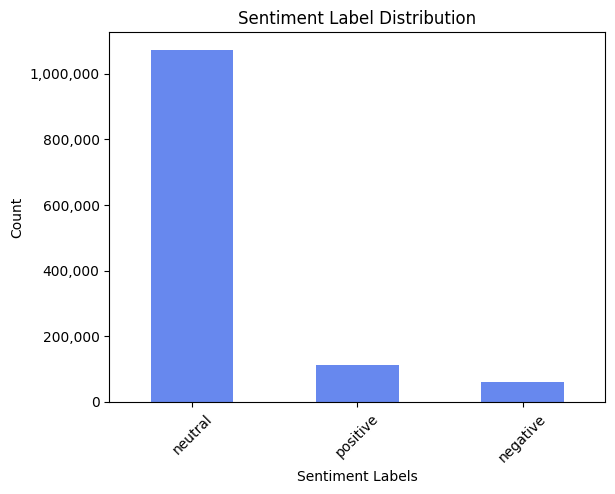

In [46]:
label_counts = df['sentiment_labels'].value_counts()

ax = label_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))


plt.show()

<b>Sampling

In [47]:
sample_size = 400000

In [48]:
df_Neutral = df[df['sentiment_labels'] == 'neutral'][0:sample_size]
df_Positive = df[df['sentiment_labels'] == 'positive']
df_Negative = df[df['sentiment_labels'] == 'negative']

In [49]:
df_Positive.shape

(111196, 12)

In [50]:
df1 = df

In [51]:
df_Positive_over = df_Positive.sample(sample_size, replace=True)
df_Negative_over = df_Negative.sample(sample_size, replace=True)
df = pd.concat([df_Neutral, df_Positive_over, df_Negative_over], axis=0)

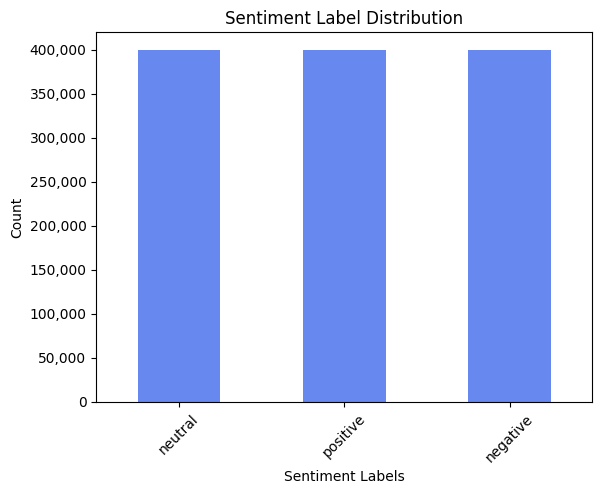

In [52]:
label_counts = df['sentiment_labels'].value_counts()

ax = label_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))


plt.show()

In [53]:
df.head()

,publish_date,headline_text,year,month,tokens,filtered_tokens,number_of_words,fd,unique_words,ngrams,sentiment_score,sentiment_labels
0,2003-02-19,aba decides against community broadcasting lic...,2003,2,"[aba, decides, against, community, broadcastin...","[aba, decides, community, broadcasting, licence]",6,"{'aba': 1, 'decides': 1, 'community': 1, 'broa...",5,"[(aba, decides), (decides, community), (commun...",0.0,neutral
2,2003-02-19,a g calls for infrastructure protection summit,2003,2,"[a, g, calls, for, infrastructure, protection,...","[calls, infrastructure, protection, summit]",7,"{'calls': 1, 'infrastructure': 1, 'protection'...",4,"[(calls, infrastructure), (infrastructure, pro...",0.0,neutral
3,2003-02-19,air nz staff in aust strike for pay rise,2003,2,"[air, nz, staff, in, aust, strike, for, pay, r...","[air, staff, aust, strike, pay, rise]",9,"{'air': 1, 'staff': 1, 'aust': 1, 'strike': 1,...",6,"[(air, staff), (staff, aust), (aust, strike), ...",0.0,neutral
4,2003-02-19,air nz strike to affect australian travellers,2003,2,"[air, nz, strike, to, affect, australian, trav...","[air, strike, affect, australian, travellers]",7,"{'air': 1, 'strike': 1, 'affect': 1, 'australi...",5,"[(air, strike), (strike, affect), (affect, aus...",0.0,neutral
7,2003-02-19,aussie qualifier stosur wastes four memphis match,2003,2,"[aussie, qualifier, stosur, wastes, four, memp...","[aussie, qualifier, stosur, wastes, four, memp...",7,"{'aussie': 1, 'qualifier': 1, 'stosur': 1, 'wa...",7,"[(aussie, qualifier), (qualifier, stosur), (st...",-0.2,neutral


<b>Selecting X and y

In [54]:
X = df["filtered_tokens"]
X = X.apply(lambda words: ' '.join(words))
y = df["sentiment_labels"]

<b> Test, Train Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [56]:
X_train.shape

(840000,)

<b> Vectorisation

In [57]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [58]:
#tfidf = TfidfTransformer()
#X_train = tfidf.fit_transform(X_train)
#X_test = tfidf.transform(X_test)
#X_train = X_train.toarray()
#X_test = X_test.toarray()

### Modelling

<b> Imports

In [59]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [60]:
y_train.shape

(840000,)

<b> Fitting Model

In [61]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

<b>Accuracy

In [62]:
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.8842972222222222


<b>Confusion Matrix

In [63]:
predicted

array(['neutral', 'positive', 'negative', ..., 'negative', 'neutral',
       'negative'], dtype='<U8')

In [64]:
cm = confusion_matrix(y_test, predicted)
print(cm)

[[118323    559   1239]
 [ 11065  93561  15157]
 [  3397  10236 106463]]


In [65]:
unique_labels = np.unique(predicted)

for i, label in enumerate(unique_labels):
    print(f"{label} - Row {i}: {cm[i]}")

negative - Row 0: [118323    559   1239]
neutral - Row 1: [11065 93561 15157]
positive - Row 2: [  3397  10236 106463]


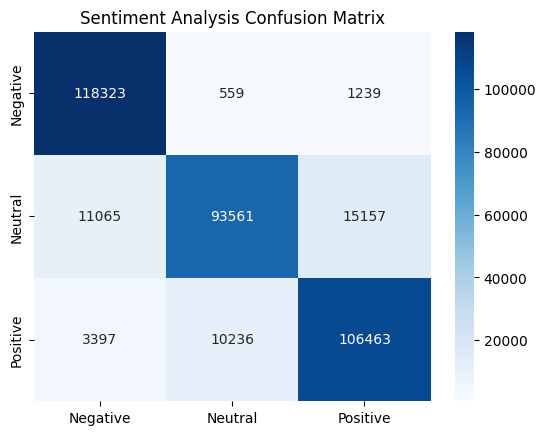

In [67]:
labels = ['Negative', 'Neutral', 'Positive']
l = sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Sentiment Analysis Confusion Matrix')
plt.show()